# <h1 align='center'> <b> 💻 LẬP TRÌNH SONG SONG 💻 </b> </h1>

Ngành: Khoa Học Dữ Liệu

Lớp: 20KDL1

Nhóm: 8

Giảng viên: Phạm Trọng Nghĩa, Trần Quốc Huy.

---
## 🧨 TOPIC:<h1 align='center'> <b>  Parallelize and optimize: image resize using seam carving </b> </h1>




**Thành viên thực hiện**

* *20280006 - Nguyễn Quốc Bảo*
* *20280007 - Võ Thái Bình*
* *20280024 - Trần Nhất Duy*

**Nội dung chính**

⭐Lời Nói Đầu

⭐Nội Dung Bài

        1. Main idea
        2. Thuật hiện tuần tự( Sequential implementation)
            * Convert from RGB to Grayscale
            * Convolution
            * Calculate the energy of each pixels using gradient magnitude
            * Find low energy seams
            * Remove low-energy seams
            * Demonstration with images
        3. Thực hiện song song( Parallel implementation)
            * Convert from RGB to Grayscale
            * Convolution
            * Calculate the energy of each pixels using gradient magnitude
            * Find low energy seams
            * Remove low-energy seams
            * Demonstration with images
        4. Tối ưu hóa
            *
            *

⭐Tổng Kết.

# **<h1 align='center'> <b> 🌻 LỜI NÓI ĐẦU 🌻</b> </h1>**

<p align="justify">Seam carving là một thuật toán dùng để thay đổi kích thước hình ảnh, nó được giới thiệu trong bài báo cáo khoa học của S. Avidan & A. Shamir. Trong bài báo, việc thay đổi kích thước ảnh được thực hiện bằng cách loại bỏ đi các điểm ảnh ít quan trọng và giữ lại các điểm ảnh quan trọng. Bức ảnh dưới đây là minh họa điều này (ảnh bên trên là ảnh gốc với kích thước 332x480 và ảnh bên dưới là ảnh sau khi áp dụng thuật toán seam carving đẻ thu nhỏ còn lại kích thước là 272x400).

<p align="justify">Mục tiêu chính của seam carving bao gồm:

  1. Giữ nguyên nội dung quan trọng: Seam carving cố gắng giữ lại những phần tử quan trọng trong ảnh, chẳng hạn như các đối tượng hay cấu trúc quan trọng, trong khi giảm hoặc mở rộng kích thước của ảnh.

  2. Tránh biến dạng không tự nhiên: Trong khi thay đổi kích thước, seam carving giữ cho các phần tử trong ảnh không bị biến dạng một cách không tự nhiên. Điều này giúp duy trì hình dạng tự nhiên của các đối tượng trong ảnh.

  3. Tự động và thông minh: Seam carving thường sử dụng các thuật toán thông minh để xác định những "đường dẫn" (seams) nào có thể được loại bỏ mà không làm mất quá nhiều thông tin chất lượng.

  4. Tính ứng dụng rộng rãi: Seam carving có thể được áp dụng cho nhiều mục đích, từ việc thay đổi kích thước ảnh đến việc tạo ảnh thu nhỏ cho các thiết bị di động mà vẫn giữ nguyên nội dung chính.

  5. Tối ưu về mặt thị giác: Mục tiêu là tạo ra ảnh đã được thay đổi kích thước mà vẫn duy trì được chất lượng và độ tương phản một cách tốt nhất.

Seam carving đã được sử dụng rộng rãi trong lĩnh vực xử lý ảnh và đồ họa máy tính để tạo ra các ảnh thay đổi kích thước mà không làm mất đi sự quan trọng của nội dung hình ảnh.


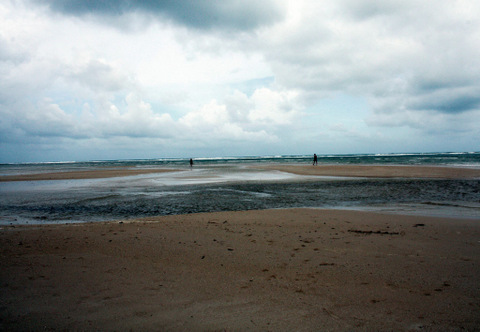

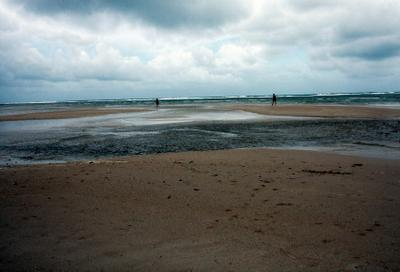

# I. ***THỰC HIỆN TUẦN TỰ***

## 1️⃣ **Main idea - Ý tưởng chính**

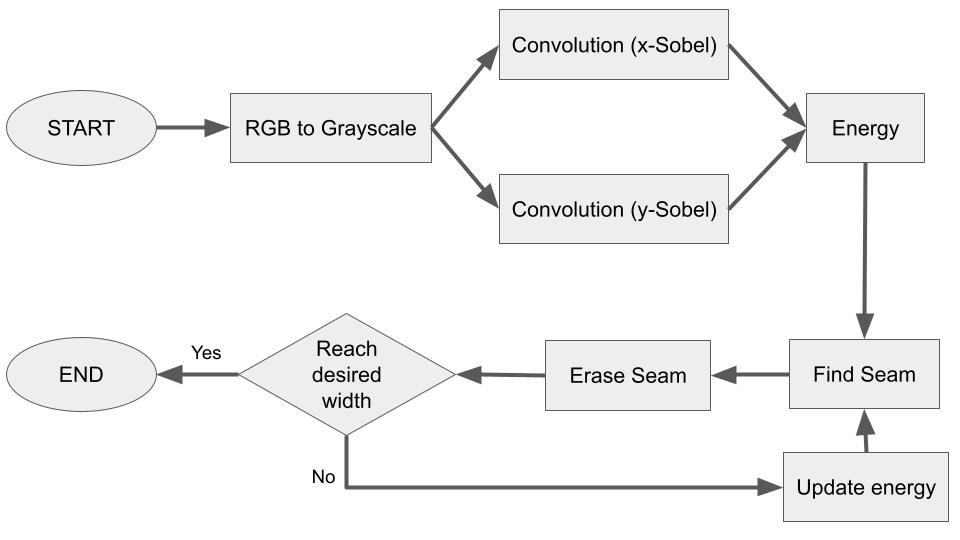


**Các bước chính của thuật toán Seam Carving:**

1. Tính toán năng lượng của từng pixel:

    * Đầu tiên, tính toán độ chênh lệch năng lượng của từng pixel trong hình ảnh. Năng lượng của một pixel thường được định nghĩa dựa trên gradient của pixel đó, tức là sự thay đổi của giá trị pixel xung quanh.
2. Xác định seam có năng lượng thấp nhất:

    * Sử dụng thông tin về năng lượng tính toán ở bước trước, xác định một "seam" có tổng năng lượng thấp nhất. Seam này thường đi qua các pixel có giá trị năng lượng thấp, tức là ít thay đổi màu sắc.
3. Loại bỏ hoặc thêm seam:

    * Nếu mục tiêu là giảm kích thước của hình ảnh, loại bỏ seam có tổng năng lượng thấp nhất. Điều này sẽ làm giảm chiều rộng hoặc chiều cao của hình ảnh.
    * Nếu mục tiêu là tăng kích thước, thêm seam có tổng năng lượng thấp nhất. Điều này sẽ làm tăng chiều rộng hoặc chiều cao của hình ảnh.
4. Lặp lại quá trình:

    * Lặp lại bước 2 và bước 3 cho đến khi kích thước mong muốn được đạt được.


## 2️⃣ **Change RGB to GrayScale**

Tại sao phải chuyển không gian màu RGB sang GrayScale:

* Tính toán năng lượng: Trong seam carving, một trong những bước quan trọng là tính toán năng lượng của từng pixel. Trong không gian màu độ xám, mỗi pixel chỉ có giá trị độ sáng, giúp giảm độ phức tạp của quá trình tính toán so với không gian màu RGB với ba kênh màu (đỏ, xanh lá cây, và lam).


* Giảm độ phức tạp tính toán: Ảnh RGB yêu cầu xử lý thông tin từ ba kênh màu, trong khi ảnh độ xám chỉ sử dụng một kênh. Điều này giúp giảm độ phức tạp tính toán và tăng hiệu suất của thuật toán.
* Lưu trữ bộ nhớ: Ảnh độ xám yêu cầu ít bộ nhớ hơn so với ảnh RGB vì không phải lưu trữ thông tin của ba kênh màu. Điều này có thể giúp tối ưu hóa sử dụng bộ nhớ và giảm tải cho hệ thống.

* Đồng nhất thông tin: Trong nhiều trường hợp, việc chuyển đổi sang độ xám giúp đồng nhất thông tin trong hình ảnh, tập trung vào độ sáng thay vì màu sắc. Điều này có thể hữu ích trong việc bảo toàn các đối tượng chính khi thực hiện seam carving.


Công thức chuyển :  <mark>gray = 0.299 * red + 0.587 * green + 0.114 * blue</mark>

Trong đó, mỗi thread sẽ xử lý từng Pixel, đọc ghi dữ liệu từ GMEM.

## 3️⃣ **Convolution**


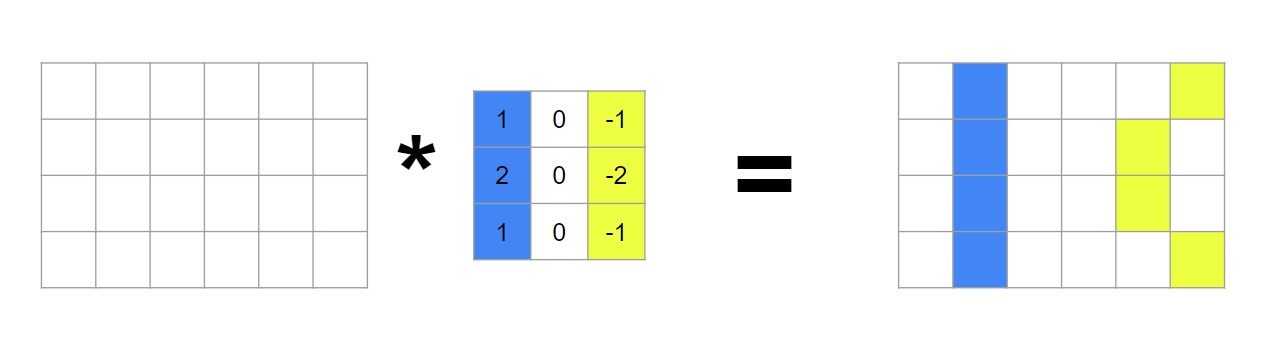

Phép convolution thường được sử dụng để đánh giá tầm quan trọng của mỗi pixel trong ảnh, với đặc tính quan trọng là "tổng của tất cả các phần tử trong bộ lọc bằng 0."

Trong ví dụ trên, bộ lọc x-Sobel thường được sử dụng để phát hiện cạnh theo chiều dọc. Trong trường hợp sử dụng ảnh xám (từ 0 đến 255, từ tối đến sáng), nếu giá trị ở bên trái lớn hơn nhiều so với giá trị ở bên phải, kết quả của pixel đó sẽ là dương (được đánh dấu màu xanh lam), và ngược lại.

Điều này có nghĩa là kết quả sẽ gần với 0 ở những vùng không có cạnh và giá trị lớn sẽ đại diện cho sự xuất hiện của một cạnh. Tuy nhiên, các giá trị này có thể là dương hoặc âm.

Mặc dù cạnh có thể là dương hoặc âm, điều này không quan trọng. Bởi vì chúng ta có thể quay bộ lọc 180° để chuyển giá trị dương thành giá trị âm và ngược lại.

Từ đó, chúng ta có thể sử dụng giá trị tuyệt đối (hàm abs) trước khi cộng với bộ lọc y-Sobel.

**Example: Convolution between a grayscale picture with x-Sobel kernel**

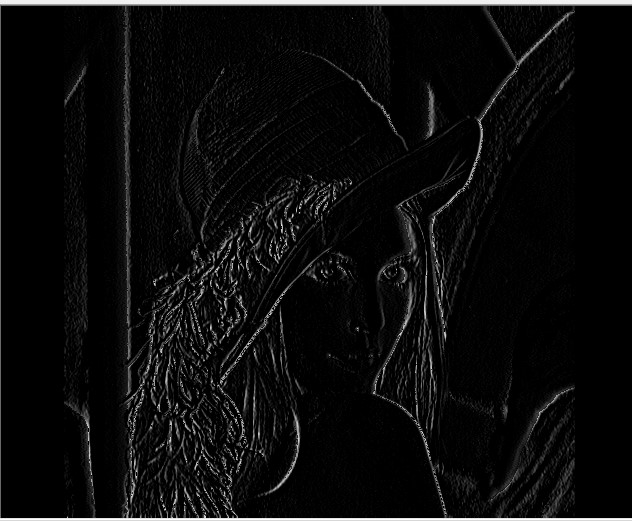

## 4️⃣ Calculate the energy of each pixels using gradient magnitude

Kernel Sobel: x_sobel và y_sobel là các kernel Sobel được sử dụng để phát hiện cạnh theo hướng ngang và dọc. Cả hai kernel này có kích thước 3x3.
Khởi tạo importance map:

Tạo một mảng importancemap có kích thước width * height để lưu trữ giá trị quan trọng của từng pixel.

**Tính toán gradient:**

  * Một vòng lặp lồng nhau duyệt qua từng pixel trong ảnh (trong hàng và cột).
Tại mỗi pixel, tính toán gradient theo hướng ngang (Gx) và hướng dọc (Gy) bằng cách áp dụng kernel Sobel.

**Tính toán giá trị quan trọng:**

  * Tại mỗi pixel, tính toán giá trị quan trọng bằng cách lấy giá trị tuyệt đối của gradient theo hướng ngang và hướng dọc, sau đó cộng chúng lại với nhau (importancemap[row*width + col] = abs(Gx) + abs(Gy)).

**Trả về importance map:** Cuối cùng, importance map được trả về. Nó chứa thông tin về độ quan trọng của mỗi pixel trong ảnh, dựa trên cạnh được phát hiện bằng kernel Sobel.

## 5️⃣ **Find low energy seams**

Đường seam thường được tìm để xác định những pixel nào nên bị loại bỏ khi thực hiện Seam Carving.
Tính toán cumulative energy map:

Dùng một vòng lặp lồng nhau để tính toán tổng năng lượng tích lũy cho từng pixel trong cumulative_energy. Công thức tính năng lượng tại mỗi pixel dựa trên các giá trị của pixel và tổng năng lượng tích lũy từ hàng trước đó.



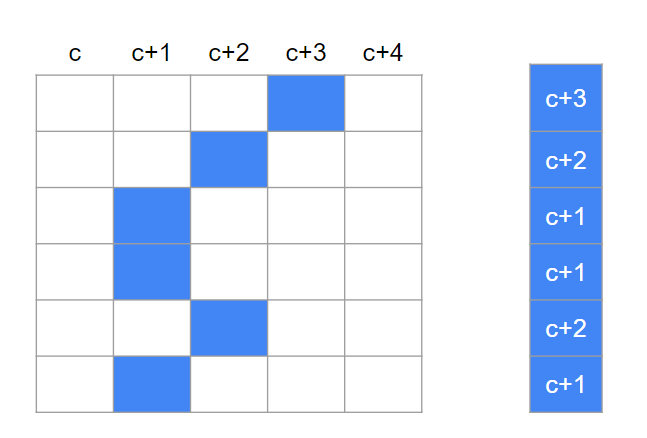

Hàng đầu tiên: tìm giá trị nhỏ nhất của hàng

Hàng tiếp theo: lấy vị trí cột của "giá trị tối thiểu của hàng đầu tiên" (c+3)

* Lấy 3 giá trị của: (c+3)-1; (c+3); (c+3)+1; lấy giá trị nhỏ nhất là (c+3)-1 = c+2. Lưu vào mảng bên phải.
* Tiếp tục đi cho đến khi đến hàng cuối cùng.

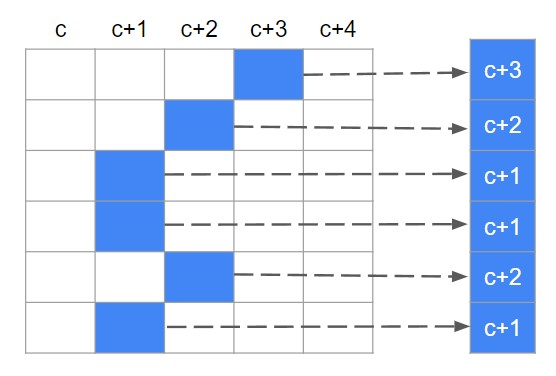

**Tìm pixel có tổng năng lượng tích lũy nhỏ nhất ở hàng cuối cùng:** Tìm index của pixel có tổng năng lượng tích lũy nhỏ nhất ở hàng cuối cùng (height - 1). Điều này sẽ là pixel ở hàng cuối cùng trên đường seam.

**Backtracking để xác định đường seam:** Sử dụng kết quả từ bước trước đó để backtracking từ dưới lên trên để xác định đường seam. Đường seam được lưu trữ trong mảng seam.


## 6️⃣ **Remove low-energy seams**

Quá trình loại bỏ seam khỏi ảnh được  thực hiện bằng cách tạo ra một ảnh mới (new_img) mà không bao gồm các pixel nằm trên đường seam.

Ý tưởng: Kiểm tra giá trị của seam[y] để xác định vị trí của đường seam trong hàng y, sau đó dựa vào vị trí này để loại bỏ các pixel và sao chéo các pixel còn lại sang ảnh mới.

**1. Xử lý khi seam[y] = 0 (đường seam bắt đầu từ vị trí 0):**

Nếu seam[y] bằng 0, có nghĩa là đường seam bắt đầu từ vị trí đầu tiên của hàng y. Ta loại bỏ pixel đầu tiên và sao chép các pixel còn lại sang ảnh mới (new_img).

**2. Xử lý khi 0 < seam[y] < width - 1 (đường seam ở giữa):**

*   Nếu seam[y] nằm giữa 0 và width - 1, có nghĩa là đường seam không bắt đầu hoặc kết thúc ở biên của ảnh.
*   Sao chép các pixel từ vị trí 0 đến seam[y] - 1 từ ảnh gốc (temp_img) sang new_img.
*   Sao chép các pixel từ seam[y] + 1 đến width - 1 từ ảnh gốc sang new_img.




**3. Xử lý khi seam[y] = width - 1 (đường seam kết thúc ở vị trí cuối cùng):**

Nếu seam[y] bằng width - 1, có nghĩa là đường seam kết thúc ở vị trí cuối cùng của hàng y. Ta loại bỏ pixel cuối cùng và sao chép các pixel còn lại sang new_img.


## 7️⃣ **Demonstration with images**

In [ ]:
!git clone https://github.com/QuocBao02/Parallel-Programming-Project.git
%cd ./Parallel-Programming-Project

**Read .pnm files**

**Compile**

**Broadcast tower image**

**Lady image**

**Elephant image**

**Snail image**

**Cat image**

# ***II. THỰC HIỆN SONG SONG***


# ***III TỐI ƯU HÓA***

# <h1> <b> 🍀 TỔNG KẾT 🍀</b> </h1>

# <h1> <b> 🎁 ĐÚT KẾT 🎁</b> </h1>

 Each member: What difficulties have you encountered?

 Each member: What have you learned?

 Your team: If you had more time, what would you do?


# <h1> <b> ✨ TÀI LIỆU THAM KHẢO ✨</b> </h1>

Slides from teacher Trọng Nghĩa

[Seam Carving - Image resizing with CUDA](https://github.com/the0nlyWyvern/seam-carving/tree/main)

https://github.com/nhathuy13598/Lap-trinh-song-song-GPU-Do-an-cuoi-ky?tab=readme-ov-file#2-y%C3%AAu-c%E1%BA%A7u-c%E1%BB%A7a-%C4%91%E1%BB%93-%C3%A1n